In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import gc
import joblib


In [2]:
df = pd.read_csv('../Data/WindSpeed/wind_dataset.csv')
df.head(3)

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [4]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [5]:
df.DATE = pd.to_datetime(df.DATE, format='%Y/%m/%d')

In [6]:
df.nunique()

DATE       6574
WIND        580
IND           3
RAIN        226
IND.1         4
T.MAX       246
IND.2         5
T.MIN       247
T.MIN.G     283
dtype: int64

#### Observation;
IND, IND.1 &, IND.2 Appear to be some sort of categorical. We'll leave them for now and evaluate them in a correlation matrix to determine OneHot vs. Ordinal

## Splitting Data

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    df, test_size=0.2, random_state=7)
X_train, y_train = train_set.drop(['WIND'], axis=1), train_set.iloc[:, 1]

## Missing Values

In [8]:
mask = X_train.isna().T.any()
print(f'NA Counts:\n{X_train.isna().sum()}')
X_train[mask]

NA Counts:
DATE         0
IND          0
RAIN         0
IND.1       52
T.MAX      494
IND.2       52
T.MIN      536
T.MIN.G    293
dtype: int64


,DATE,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
742,1963-01-13,0,0.0,4.0,NaN,4.0,NaN,-13.0
3675,1971-01-24,0,0.4,0.0,10.2,4.0,NaN,0.3
1955,1966-05-10,0,1.1,NaN,NaN,NaN,NaN,NaN
1731,1965-09-28,0,0.0,4.0,NaN,4.0,NaN,-2.0
1536,1965-03-17,0,0.6,4.0,NaN,4.0,NaN,2.1
...,...,...,...,...,...,...,...,...
1728,1965-09-25,4,0.0,4.0,NaN,4.0,NaN,10.0
772,1963-02-12,0,0.0,4.0,NaN,4.0,NaN,-0.1
3896,1971-09-02,0,2.8,0.0,20.0,0.0,9.1,NaN
1092,1963-12-29,0,1.5,4.0,NaN,4.0,NaN,5.0


## Data Visualization

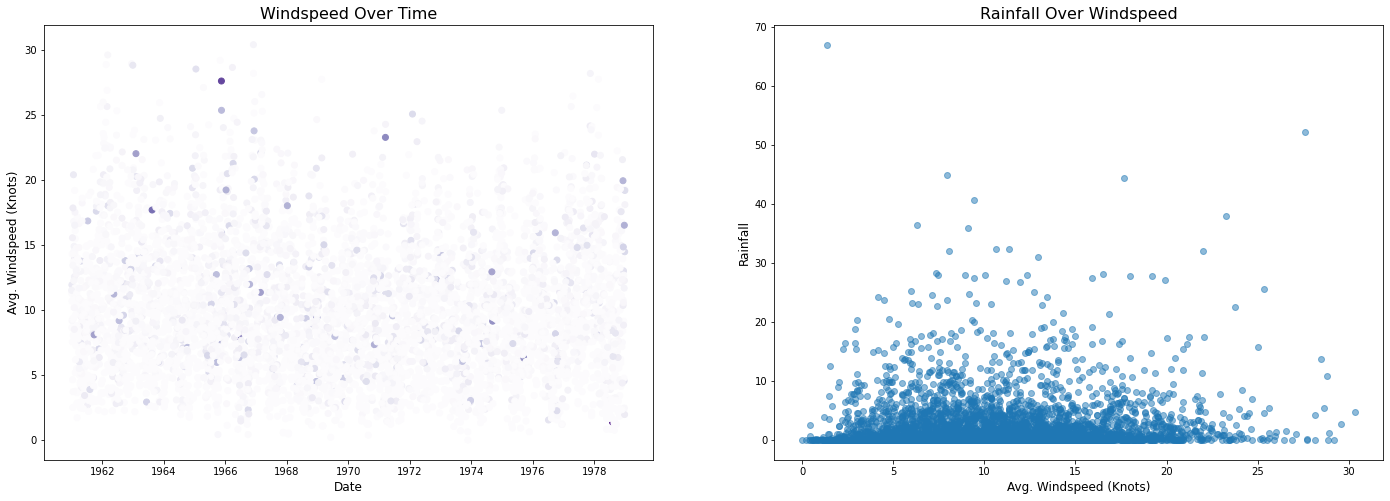

In [9]:
fig, axs = plt.subplots(1,2, figsize=(24, 8))
axs[0].scatter(train_set['DATE'], train_set['WIND'], cmap='Purples', c=train_set['RAIN'])
axs[0].set_title('Windspeed Over Time', fontsize=16)
axs[0].set_ylabel('Avg. Windspeed (Knots)', fontsize=12)
axs[0].set_xlabel('Date', fontsize=12)
plt.scatter(train_set['WIND'], train_set['RAIN'], alpha=0.5)
axs[1].set_title('Rainfall Over Windspeed', fontsize=16)
axs[1].set_ylabel('Rainfall', fontsize=12)
axs[1].set_xlabel('Avg. Windspeed (Knots)', fontsize=12)
plt.show()

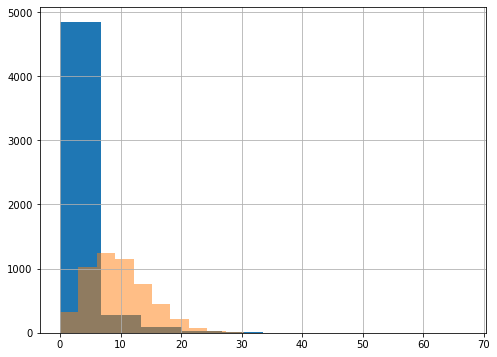

In [10]:
train_set['RAIN'].hist(figsize=(8,6))
train_set['WIND'].hist(alpha=0.5)
plt.show()

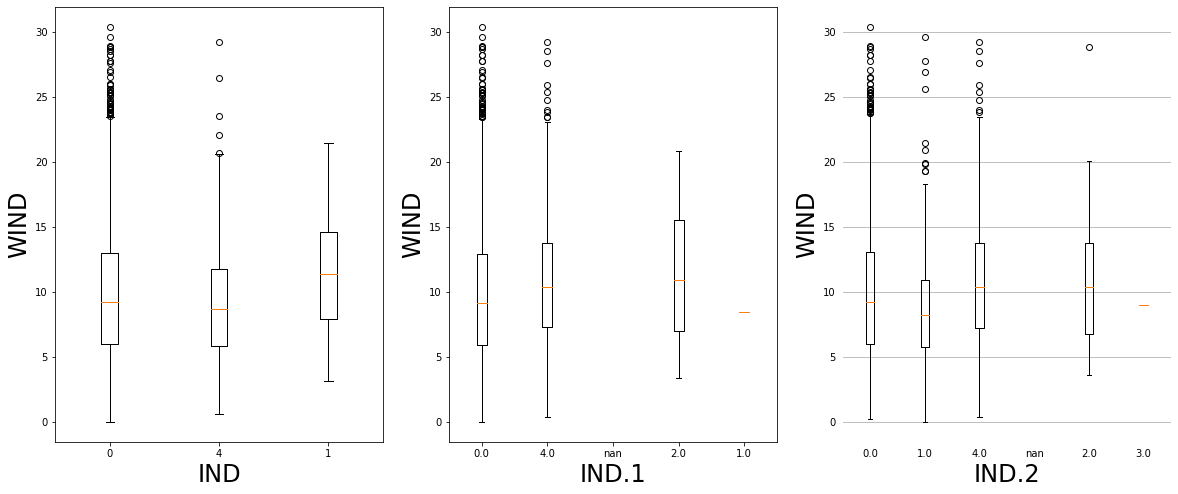

In [11]:
fig, axs = plt.subplots(1,3, figsize=(20,8))
for idx, i in enumerate(list(train_set['IND'].drop_duplicates())):
    axs[0].boxplot(train_set[train_set['IND']==i]['WIND'], positions=[idx], labels=[i])
    axs[0].set_xlabel('IND', fontsize=24)
    axs[0].set_ylabel('WIND', fontsize=24)
for idx, i in enumerate(list(train_set['IND.1'].drop_duplicates())):
    axs[1].boxplot(train_set[train_set['IND.1']==i]['WIND'], positions=[idx], labels=[i])
    axs[1].set_xlabel('IND.1', fontsize=24)
    axs[1].set_ylabel('WIND', fontsize=24)
for idx, i in enumerate(list(train_set['IND.2'].drop_duplicates())):
    axs[2].boxplot(train_set[train_set['IND.2']==i]['WIND'], positions=[idx], labels=[i])
    axs[2].set_xlabel('IND.2', fontsize=24)
    axs[2].set_ylabel('WIND', fontsize=24)
plt.grid(axis='y')
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.show()

In [12]:

# fig, axs = plt.subplots(1,3, figsize=(20,8))
# for idx, i in enumerate(list(train_set['IND'].drop_duplicates().dropna())):
#     axs[0].violinplot(train_set[train_set['IND']==i]['WIND'], positions=[idx])
#     axs[0].set_xticks(list(train_set['IND'].unique()),labels=list(train_set['IND'].unique()))
#     axs[0].set_xlabel('IND', fontsize=24)
#     axs[0].set_ylabel('WIND', fontsize=24)
# for idx, i in enumerate(list(train_set['IND.1'].drop_duplicates().dropna())):
#     axs[1].violinplot(train_set[train_set['IND.1']==i]['WIND'], positions=[idx])
#     axs[1].set_xticks(list(train_set['IND.1'].unique()),labels=list(train_set['IND.1'].unique()))
#     axs[1].set_xlabel('IND.1', fontsize=24)
#     axs[1].set_ylabel('WIND', fontsize=24)
# for idx, i in enumerate(list(train_set['IND.2'].drop_duplicates().dropna())):
#     axs[2].violinplot(train_set[train_set['IND.2']==i]['WIND'], positions=[idx])
#     axs[2].set_xticks(list(train_set['IND.2'].unique()),labels=list(train_set['IND.2'].unique()))
#     axs[2].set_xlabel('IND.2', fontsize=24)
#     axs[2].set_ylabel('WIND', fontsize=24)
# plt.grid(axis='y')
# plt.box(False)
# plt.tick_params(left=False, bottom=False)
# plt.show()

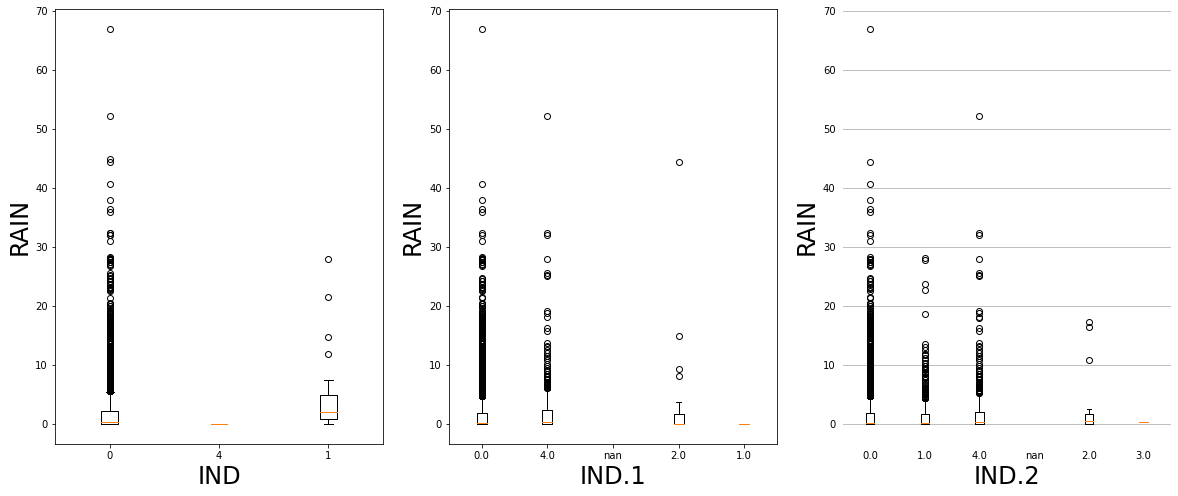

In [13]:
fig, axs = plt.subplots(1,3, figsize=(20,8))
for idx, i in enumerate(list(train_set['IND'].drop_duplicates())):
    axs[0].boxplot(train_set[train_set['IND']==i]['RAIN'], positions=[idx], labels=[i])
    axs[0].set_xlabel('IND', fontsize=24)
    axs[0].set_ylabel('RAIN', fontsize=24)
for idx, i in enumerate(list(train_set['IND.1'].drop_duplicates())):
    axs[1].boxplot(train_set[train_set['IND.1']==i]['RAIN'], positions=[idx], labels=[i])
    axs[1].set_xlabel('IND.1', fontsize=24)
    axs[1].set_ylabel('RAIN', fontsize=24)

for idx, i in enumerate(list(train_set['IND.2'].drop_duplicates())):
    axs[2].boxplot(train_set[train_set['IND.2']==i]['RAIN'], positions=[idx], labels=[i])
    axs[2].set_xlabel('IND.2', fontsize=24)
    axs[2].set_ylabel('RAIN', fontsize=24)
plt.grid(axis='y')
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.show()

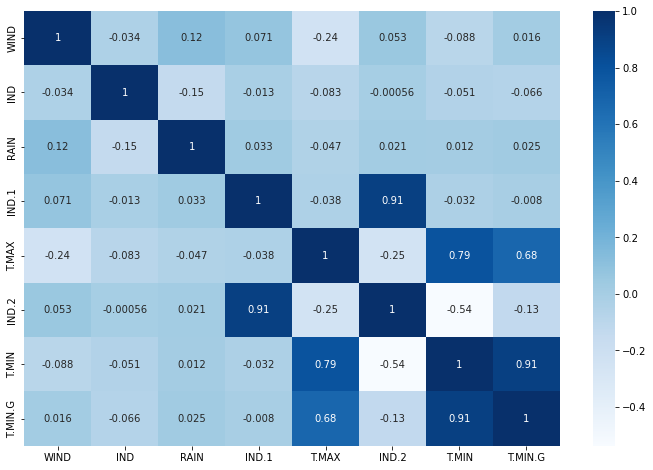

In [14]:
corr_matrix = train_set.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

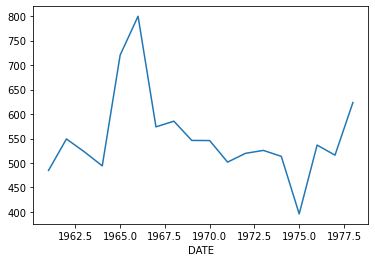

In [15]:
X_train.groupby(X_train.DATE.dt.year)['RAIN'].agg('sum').plot()
plt.show()

In [16]:
total_rainfall = X_train.groupby(X_train.DATE.dt.year)['RAIN'].agg('sum').sort_values()

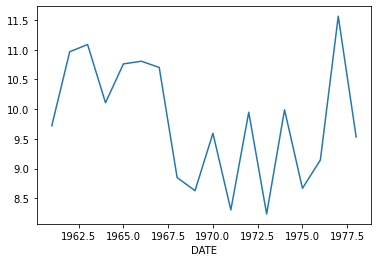

In [17]:
train_set.groupby(train_set.DATE.dt.year)['WIND'].agg('mean').plot()
plt.show()

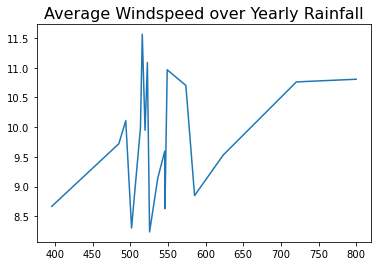

In [18]:
_ = pd.DataFrame([train_set.groupby(train_set.DATE.dt.year)['WIND'].agg('mean'), total_rainfall]).T.sort_values('RAIN')
plt.plot(_['RAIN'], _['WIND'])
plt.title('Average Windspeed over Yearly Rainfall', fontsize=16)
plt.show()

# Pipeline

In [19]:
cat_list = ['IND', 'IND.1', 'IND.2']
num_list = ['RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_selector, make_column_transformer

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    MinMaxScaler()
)
preprocessing = ColumnTransformer([
    ('cat', cat_pipeline, cat_list),
    ('num', num_pipeline, num_list),
], remainder='drop')

## Helper Functions

# First Model Runthroughs

## SGD

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = make_pipeline(preprocessing, SGDRegressor(random_state=7))
sgd_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['IND', 'IND.1', 'IND.2']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['RAIN', 'T.MAX', 'T.MIN',
                                                   'T.MIN.G'])])),
                ('sgdregressor', SGDRegressor(random_state=7))])

In [22]:
from sklearn.model_selection import cross_val_score
-cross_val_score(sgd_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

array([3.79671671, 3.65187991, 3.74255386, 3.78417437, 3.71933814])

In [23]:
_ = pd.DataFrame(sgd_reg.predict(X_train))
_.join(y_train.reset_index(drop=True))

,0,WIND
0,10.663144,15.92
1,10.510433,20.08
2,7.631529,10.21
3,9.796536,5.91
4,7.910482,5.21
...,...,...
5254,6.903071,1.67
5255,11.056100,10.08
5256,8.938106,13.67
5257,9.675058,15.54


## DecisionTree

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=7))
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['IND', 'IND.1', 'IND.2']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['RAIN', 'T.MAX', 'T.MIN',
                                                   'T.MIN.G'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=7))])

In [25]:
tree_predictions = tree_reg.predict(X_train)
tree_mse =  -cross_val_score(tree_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
tree_mse

array([4.99118726, 4.97020913, 4.84071198, 5.1656452 , 4.99182525])

## RForest

In [26]:
from sklearn.ensemble import RandomForestRegressor
rforest_reg = make_pipeline(preprocessing, RandomForestRegressor())
rforest_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['IND', 'IND.1', 'IND.2']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['RAIN', 'T.MAX', 'T.MIN',
                                                   'T.MIN.G'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [27]:
tree_mse = -cross_val_score(rforest_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
tree_mse

array([3.77569921, 3.64598136, 3.59118402, 3.76585317, 3.67187075])

In [28]:
rforest_predictions = pd.DataFrame(rforest_reg.predict(X_train))
rforest_predictions.join(y_train.reset_index(drop=True))

,0,WIND
0,13.10448,15.92
1,17.81790,20.08
2,11.41110,10.21
3,6.68740,5.91
4,5.28270,5.21
...,...,...
5254,2.81230,1.67
5255,12.46730,10.08
5256,11.19380,13.67
5257,13.86070,15.54


In [29]:
pd.Series(rforest_reg['randomforestregressor'].feature_importances_,index=rforest_reg[:-1].get_feature_names_out())

cat__IND_0.0      0.007750
cat__IND_1.0      0.001386
cat__IND_4.0      0.007615
cat__IND.1_0.0    0.004152
cat__IND.1_1.0    0.000009
cat__IND.1_2.0    0.001424
cat__IND.1_4.0    0.002180
cat__IND.2_0.0    0.004657
cat__IND.2_1.0    0.001136
cat__IND.2_2.0    0.001517
cat__IND.2_3.0    0.000005
cat__IND.2_4.0    0.003272
num__RAIN         0.211034
num__T.MAX        0.277157
num__T.MIN        0.204093
num__T.MIN.G      0.272611
dtype: float64

## Takeaway;
This problem can be projected down to 4 dimensions while retaining 95% variance.

# Pipeline Adjustments

* Is Scaler performing an acceptable scaling and not skewing the data?
* Would OrdinalEncoding have an acceptable effect on Categories?
* What would removing Z>=3 do? 

### Is Scaler performing acceptably?

In [30]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train[num_list])
X_ = imputer.transform(X_train[num_list])


In [31]:
sc_ = StandardScaler()
sc_.fit(X_)
sc_X_ = sc_.transform(X_)

In [32]:
sc_X_[:, 0]

array([-0.46047692, -0.26586934, -0.36317313, ..., -0.41182502,
       -0.46047692, -0.46047692])

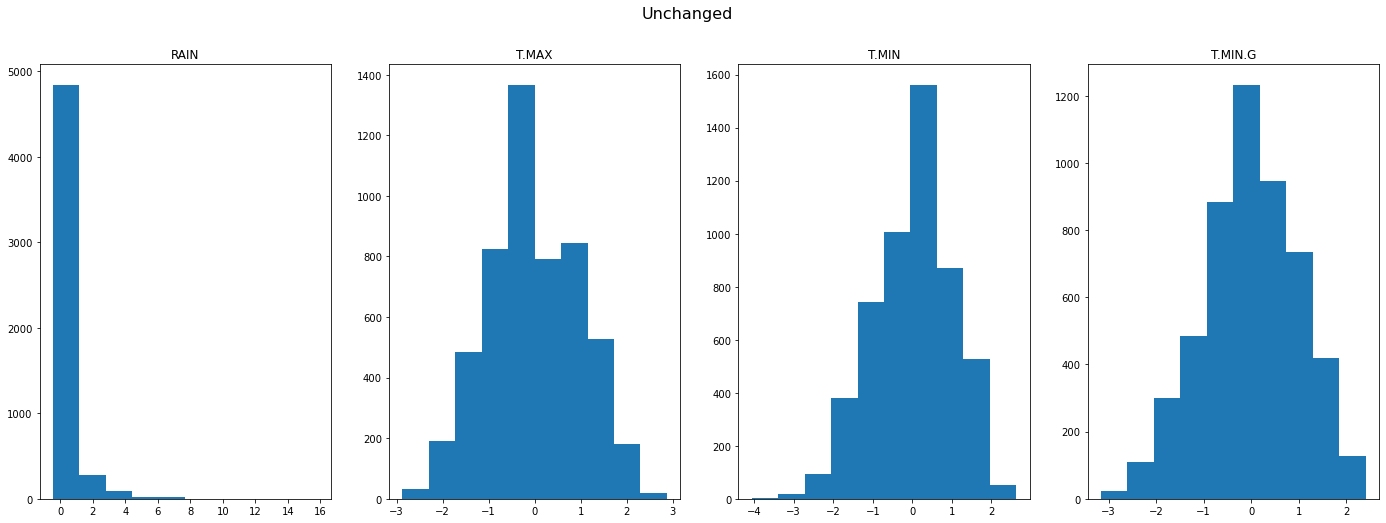

In [33]:
fig, axs = plt.subplots(1, 4, figsize=(24, 8))
axs = axs.flatten()
for idx in range(X_.shape[1]):
    axs[idx].hist(sc_X_[:, idx])
    axs[idx].set_title(imputer.get_feature_names_out()[idx])
plt.suptitle('Unchanged', fontsize=16)
plt.show()

C:\Users\Charles\AppData\Local\Temp\ipykernel_15256\2536722845.py:4: RuntimeWarning: invalid value encountered in power
  axs[idx].hist(sc_X_[:, idx]**0.25)


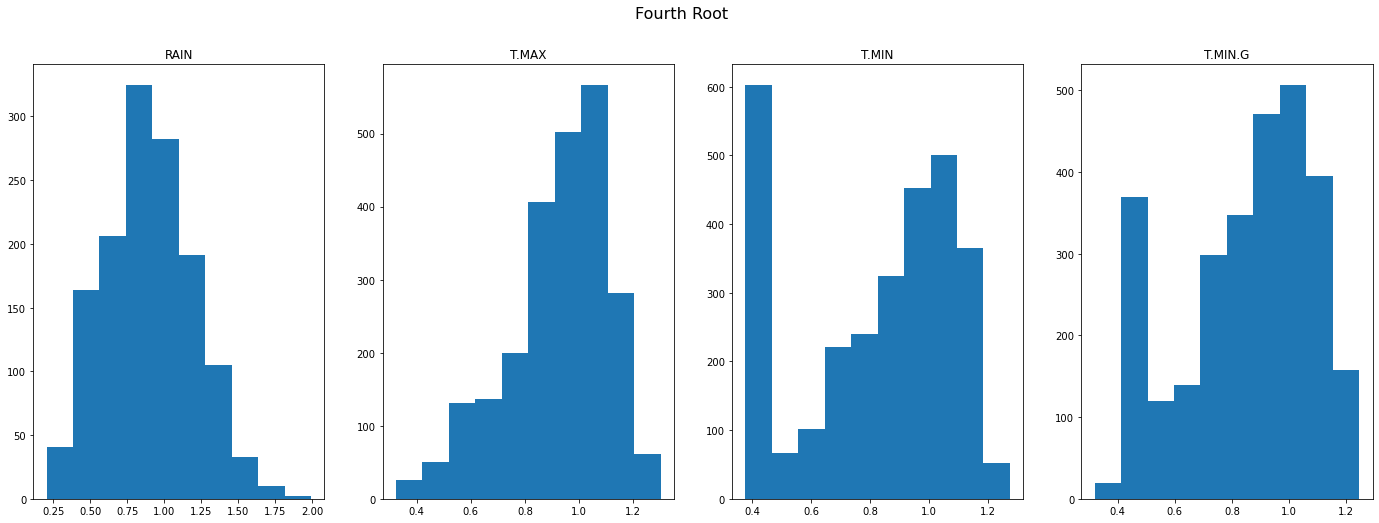

In [34]:
fig, axs = plt.subplots(1, 4, figsize=(24, 8))
axs = axs.flatten()
for idx in range(X_.shape[1]):
    axs[idx].hist(sc_X_[:, idx]**0.25)
    axs[idx].set_title(imputer.get_feature_names_out()[idx])
plt.suptitle('Fourth Root', fontsize=16)
plt.show()

## Pipeline2

In [35]:
def fourth_root(X):
    return X**0.25

# pretrans_pipeline = Pipeline([
#     ('impute', SimpleImputer(strategy='median')),
#     ('function', FunctionTransformer(fourth_root, feature_names_out='one-to-one')),
#     ('scaler', StandardScaler())
# ])
pretrans_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(fourth_root, feature_names_out='one-to-one'),
    MinMaxScaler()
)
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    MinMaxScaler()
)
preprocessing2 = ColumnTransformer([
    ('Adjust_dist', pretrans_pipeline, ['RAIN']),
    ('cat', cat_pipeline, cat_list),
    ('num', num_pipeline, ['T.MAX', 'T.MIN', 'T.MIN.G']),
], remainder='drop')

### SGD

In [36]:
sgd_reg = make_pipeline(preprocessing2, SGDRegressor(random_state=7))
sgd_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Adjust_dist',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function fourth_root at 0x0000020A3778ECB0>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['RAIN']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['IND', 'IND.1', 'IND.2']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['T.MAX', 'T.MIN',
                                                   'T.MIN.G'])])),
                ('sgdregressor', SGDRegressor(random_state=7))])

In [37]:
-cross_val_score(sgd_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

array([3.698854  , 3.5519466 , 3.629525  , 3.70821762, 3.63446935])

In [38]:
mask = [X_train[num_list].isna()
X_train[mask][num_list]

SyntaxError: '[' was never closed (2247347373.py, line 1)

### Decision Trees

In [ ]:
tree_reg = make_pipeline(preprocessing2, DecisionTreeRegressor(random_state=7))
tree_reg.fit(X_train, y_train)

In [ ]:
-cross_val_score(tree_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

### RForest


In [ ]:
rforest_reg = make_pipeline(preprocessing, RandomForestRegressor())
rforest_reg.fit(X_train, y_train)

In [ ]:
tree_mse = -cross_val_score(rforest_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
tree_mse

# Parameter Searching

In [39]:
from sklearn.base import clone
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## SGD

In [232]:
param_grid = [
    {
        'sgdregressor__penalty':['l2', 'l1', 'elasticnet'],
        'sgdregressor__alpha':[0.0001, 0.001, 0.01, 0.1],
        'sgdregressor__learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'],
        'sgd_regressor__eta0':[0.01, 0.1, 0.5, 1],
    },
]
pca = PCA()
sgd_pipe = make_pipeline(preprocessing2, SGDRegressor(random_state=7))
sgd_gridsearch = GridSearchCV(sgd_pipe, param_grid, cv=3, n_jobs=4, scoring='neg_mean_absolute_error')
sgd_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Adjust_dist',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<function fourth_root at 0x000002147034B880>)),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['RAIN']),
                                                                        ('ca...
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['T.MAX',
                                                                          'T.MIN',
                                                                          'T.MIN.G'])])),
                                       ('sgdregressor',
                                        SGDRegressor(random_state=7))]),
             n_jobs=4,
             param_grid=[{'sgdregressor__alpha': [0.0001, 0.001, 0.01, 0.1],
                          'sgdregressor__learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                          'sgdregressor__penalty': ['l2', 'l1', 'elasticnet']}],
             scoring='neg_mean_absolute_error')

In [233]:
pd.DataFrame(sgd_gridsearch.cv_results_).sort_values(by='mean_test_score', ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgdregressor__alpha,param_sgdregressor__learning_rate,param_sgdregressor__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.053668,0.004027,0.008666,0.000470,0.0001,invscaling,l1,"{'sgdregressor__alpha': 0.0001, 'sgdregressor_...",-3.592278,-3.652878,-3.670098,-3.638418,0.033375,1
22,0.034664,0.003855,0.007333,0.000472,0.001,adaptive,l1,"{'sgdregressor__alpha': 0.001, 'sgdregressor__...",-3.598542,-3.642415,-3.674483,-3.638480,0.031127,2
8,0.055614,0.005279,0.009001,0.000003,0.0001,invscaling,elasticnet,"{'sgdregressor__alpha': 0.0001, 'sgdregressor_...",-3.592430,-3.653195,-3.670129,-3.638585,0.033360,3


In [237]:
-cross_val_score(sgd_gridsearch.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

array([3.69849643, 3.55197533, 3.62913033, 3.70800051, 3.63436089])

## Decision Tree

In [241]:
param_grid = [
    {
        'decisiontreeregressor__criterion':['absolute_error'],
        'decisiontreeregressor__splitter':['best'],
        # 'decisiontreeregressor__max_depth':[],
        'decisiontreeregressor__min_samples_split':[2,3,4,8],
        'decisiontreeregressor__min_samples_leaf':[1,2,3,4,5],
        'decisiontreeregressor__max_features':[None, 'sqrt', 3, 4, 8, 12, 17],
    },
]
# pca = PCA()
tree_pipe = make_pipeline(preprocessing2, DecisionTreeRegressor(random_state=7))
tree_gridsearch = GridSearchCV(tree_pipe, param_grid, cv=3, n_jobs=4, scoring='neg_mean_absolute_error')
tree_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Adjust_dist',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<function fourth_root at 0x000002147034B880>)),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['RAIN']),
                                                                        ('ca...
                                        DecisionTreeRegressor(random_state=7))]),
             n_jobs=4,
             param_grid=[{'decisiontreeregressor__criterion': ['absolute_error'],
                          'decisiontreeregressor__max_features': [None, 'sqrt',
                                                                  3, 4, 8, 12,
                                                                  17],
                          'decisiontreeregressor__min_samples_leaf': [1, 2, 3,
                                                                      4, 5],
                          'decisiontreeregressor__min_samples_split': [2, 3, 4,
                                                                       8],
                          'decisiontreeregressor__splitter': ['best']}],
             scoring='neg_mean_absolute_error')

In [242]:
pd.DataFrame(tree_gridsearch.cv_results_).sort_values(by='mean_test_score', ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeregressor__criterion,param_decisiontreeregressor__max_features,param_decisiontreeregressor__min_samples_leaf,param_decisiontreeregressor__min_samples_split,param_decisiontreeregressor__splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
39,0.128666,0.007364,0.007334,4.708651e-04,absolute_error,sqrt,5,8,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.799025,-3.824157,0.022141,1
38,0.129664,0.006800,0.008004,2.697398e-06,absolute_error,sqrt,5,4,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.799025,-3.824157,0.022141,1
37,0.129998,0.008285,0.007669,4.725506e-04,absolute_error,sqrt,5,3,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.799025,-3.824157,0.022141,1
36,0.128999,0.006685,0.007666,4.725506e-04,absolute_error,sqrt,5,2,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.799025,-3.824157,0.022141,1
79,0.130664,0.006129,0.007334,4.740144e-04,absolute_error,4,5,8,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.842085,-3.838510,0.013447,5
76,0.132329,0.005736,0.007335,4.731687e-04,absolute_error,4,5,2,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.842085,-3.838510,0.013447,5
77,0.132001,0.007874,0.007000,2.973602e-07,absolute_error,4,5,3,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.842085,-3.838510,0.013447,5
78,0.135003,0.013928,0.007668,9.422915e-04,absolute_error,4,5,4,best,{'decisiontreeregressor__criterion': 'absolute...,-3.820548,-3.852898,-3.842085,-3.838510,0.013447,5
34,0.125667,0.014335,0.007001,2.099648e-06,absolute_error,sqrt,4,4,best,{'decisiontreeregressor__criterion': 'absolute...,-3.930168,-3.783460,-3.855000,-3.856209,0.059900,9
35,0.128664,0.013721,0.007670,4.740681e-04,absolute_error,sqrt,4,8,best,{'decisiontreeregressor__criterion': 'absolute...,-3.930168,-3.783460,-3.855000,-3.856209,0.059900,9


In [249]:
-cross_val_score(tree_gridsearch.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

array([3.95297529, 3.93485266, 3.85860266, 3.89754278, 3.70108944])

#### AVG Mean improved
Average mean absolute error for decision tree in pipeline1 was 4.99, now 3.87

## RForest

In [223]:
param_grid = [
    {
        # 'pca__n_components':[0.9, 0.95, 0.98],
        'randomforestregressor__n_estimators':[50,100,150,200,250],
        'randomforestregressor__min_samples_split':[2,3,4,8],
        'randomforestregressor__min_samples_leaf':[1,2,3,4,5],
        'randomforestregressor__random_state':[7],
    },
    {
        # 'pca__n_components':[3, 4, 6, 8, 12, 16, 17],
        'randomforestregressor__n_estimators':[50,100,150,200,250],
        'randomforestregressor__min_samples_split':[2,3,4,8],
        'randomforestregressor__min_samples_leaf':[1,2,3,4,5],
        'randomforestregressor__random_state':[7],
    },
]
pca = PCA()
rforest_pipe = make_pipeline(preprocessing2, RandomForestRegressor(random_state=7))
rforest_gridsearch = GridSearchCV(rforest_pipe, param_grid, cv=3, n_jobs=6, scoring='neg_mean_absolute_error')
rforest_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Adjust_dist',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<function fourth_root at 0x000002147034B880>)),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['RAIN']),
                                                                        ('ca...
                                                                       8],
                          'randomforestregressor__n_estimators': [50, 100, 150,
                                                                  200, 250],
                          'randomforestregressor__random_state': [7]},
                         {'randomforestregressor__min_samples_leaf': [1, 2, 3,
                                                                      4, 5],
                          'randomforestregressor__min_samples_split': [2, 3, 4,
                                                                       8],
                          'randomforestregressor__n_estimators': [50, 100, 150,
                                                                  200, 250],
                          'randomforestregressor__random_state': [7]}],
             scoring='neg_mean_absolute_error')

In [255]:
pd.Series(rforest_gridsearch.best_estimator_['randomforestregressor'].feature_importances_, index=rforest_gridsearch.best_estimator_[:-1].get_feature_names_out())

Adjust_dist__RAIN    0.243592
cat__IND_0.0         0.004001
cat__IND_1.0         0.000020
cat__IND_4.0         0.005057
cat__IND.1_0.0       0.002117
cat__IND.1_1.0       0.000000
cat__IND.1_2.0       0.000032
cat__IND.1_4.0       0.001911
cat__IND.2_0.0       0.003383
cat__IND.2_1.0       0.000299
cat__IND.2_2.0       0.000000
cat__IND.2_3.0       0.000000
cat__IND.2_4.0       0.001887
num__T.MAX           0.301026
num__T.MIN           0.174689
num__T.MIN.G         0.261985
dtype: float64

In [256]:
pd.DataFrame(rforest_gridsearch.cv_results_).sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__min_samples_leaf,param_randomforestregressor__min_samples_split,param_randomforestregressor__n_estimators,param_randomforestregressor__random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
199,1.555400,0.013962,0.067000,0.000818,5,8,250,7,"{'randomforestregressor__min_samples_leaf': 5,...",-3.615445,-3.491986,-3.598356,-3.568596,0.054618,1
84,1.578429,0.027775,0.070336,0.001884,5,2,250,7,"{'randomforestregressor__min_samples_leaf': 5,...",-3.615445,-3.491986,-3.598356,-3.568596,0.054618,1
194,1.584220,0.040138,0.074029,0.005696,5,4,250,7,"{'randomforestregressor__min_samples_leaf': 5,...",-3.615445,-3.491986,-3.598356,-3.568596,0.054618,1
189,1.573667,0.017820,0.068997,0.000817,5,3,250,7,"{'randomforestregressor__min_samples_leaf': 5,...",-3.615445,-3.491986,-3.598356,-3.568596,0.054618,1
184,1.632828,0.012216,0.074871,0.004334,5,2,250,7,"{'randomforestregressor__min_samples_leaf': 5,...",-3.615445,-3.491986,-3.598356,-3.568596,0.054618,1


In [257]:
-cross_val_score(rforest_gridsearch.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

array([3.65349249, 3.56704526, 3.47542414, 3.67287753, 3.54314215])

#### Takeaway: 
* Our mean absolute error is down to ~3.58
* Via Transformation we've gotten 4 features to represent 98% of importances. (Was 94%)

# Pipeline 3 -- Feature Creation

## Time-step & Lag Feature Analysis

Date Format is: <b>YYYY-MM-DD</b>
Features which could be extracted from this;
* Year
* Month
* Day
* Season
* Year lag month
* Year lag day
* Month lag day
* Month lag year
* Day of week

<b><u>Hypothesis:</u></b>
Powerful combinations will include;
* Year & Month
* Year & Day
* Year lag Month


Create copy of Date & Check for missing values

In [40]:
time_X = X_train.copy()
time_X = time_X.sort_values(by='DATE').reset_index(drop=True)

In [41]:
day_step = pd.Series(np.arange(len(time_X)), name='daystep')
df_test = pd.concat([time_X.sort_values(by='DATE'), day_step], axis=1)
# ,y_train.reset_index(drop=True)

In [42]:
df_test.loc[:, ['daystep']]

,daystep
0,0
1,1
2,2
3,3
4,4
...,...
5254,5254
5255,5255
5256,5256
5257,5257


In [43]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(df_test.loc[:, ['daystep']], y_train)

LinearRegression()

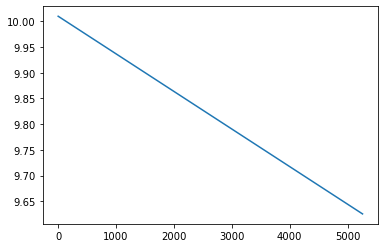

In [44]:
pred = pd.Series(linear.predict(df_test.loc[:, ['daystep']]), index=df_test.index)
pred.plot()
plt.show()

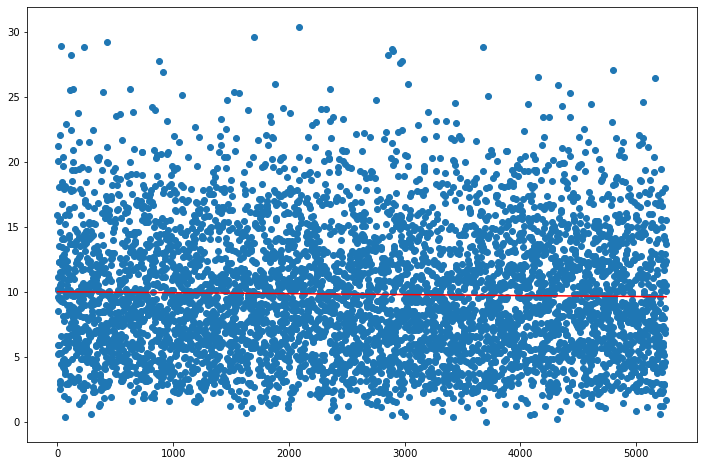

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(df_test['daystep'],y_train.reset_index(drop=True))
plt.plot(pred, color='red')
plt.show()

In [46]:
pd.DataFrame(pd.date_range(
  start="1961-01-02", end="1978-12-31").difference(time_X['DATE']))

,0
0,1961-01-09
1,1961-01-14
2,1961-01-20
3,1961-01-25
4,1961-01-29
...,...
1309,1978-12-06
1310,1978-12-10
1311,1978-12-17
1312,1978-12-25


1314 rows means we are missing about 20% of days!

In [47]:
import datetime
from dateutil.rrule import rrule, MONTHLY

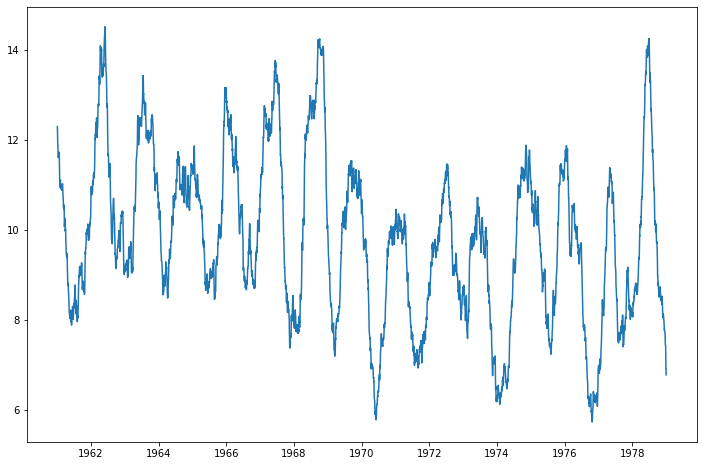

In [68]:
m_avg = time_X[['RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']].join(y_train).rolling(
    window=90,
    center=True,
    min_periods=30
).mean()
plt.figure(figsize=(12,8))
plt.plot(time_X['DATE'], m_avg['WIND'])
plt.show()

In [50]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(
    index=time_X.DATE,
    constant=True,
    order=1,
    drop=True,
)
_ = dp.in_sample()
_.head()

,const,trend
DATE,,
1961-01-02,1.0,1.0
1961-01-03,1.0,2.0
1961-01-04,1.0,3.0
1961-01-05,1.0,4.0
1961-01-06,1.0,5.0


In [51]:
month = time_X['DATE'].apply(lambda X: X.month)
year = time_X['DATE'].apply(lambda X: X.year)
# time_X = pd.concat([time_X, year, month,], axis=1)

In [52]:
pd.date_range(start=time_X['DATE'].min(), end=time_X['DATE'].max(), periods=None, freq='M', tz=None, normalize=False, name=None,  inclusive=None)

DatetimeIndex(['1961-01-31', '1961-02-28', '1961-03-31', '1961-04-30',
               '1961-05-31', '1961-06-30', '1961-07-31', '1961-08-31',
               '1961-09-30', '1961-10-31',
               ...
               '1978-03-31', '1978-04-30', '1978-05-31', '1978-06-30',
               '1978-07-31', '1978-08-31', '1978-09-30', '1978-10-31',
               '1978-11-30', '1978-12-31'],
              dtype='datetime64[ns]', length=216, freq='M')

In [514]:
month.name = 'MONTH'
time_X.join(month) 

,DATE,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,MONTH
0,1961-01-02,0,5.1,0.0,7.2,0.0,4.2,1.1,1
1,1961-01-03,0,0.4,0.0,5.5,0.0,0.5,-0.5,1
2,1961-01-04,0,0.2,0.0,5.6,0.0,0.4,-3.2,1
3,1961-01-05,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1
4,1961-01-06,0,0.0,0.0,6.5,0.0,1.2,-2.0,1
...,...,...,...,...,...,...,...,...,...
5254,1978-12-26,0,9.0,0.0,9.8,0.0,2.3,-2.0,12
5255,1978-12-27,0,16.8,0.0,9.8,0.0,4.0,0.0,12
5256,1978-12-29,0,14.7,0.0,5.0,0.0,3.5,3.2,12
5257,1978-12-30,0,4.9,0.0,2.9,0.0,0.3,-0.5,12


In [330]:
pd.DataFrame(pd.date_range(
  start="1961-01", end="1978-12").difference(time_X))

,0
0,1961-01-01
1,1961-01-09
2,1961-01-14
3,1961-01-20
4,1961-01-25
...,...
1304,1978-10-21
1305,1978-10-30
1306,1978-11-15
1307,1978-11-23
